Esse código tenta prever os preços do BTC-USD usando o modelo de regressão XGBoost.  
O XGBoost é um algoritmo de aprendizado de máquina supervisionado que implementa o método de boosting (combinação de vários modelos fracos para formar um modelo forte).

In [57]:
# Importar as bibliotecas
import yfinance as yf
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [58]:
# Carregar os dados BTC-USD
btc = yf.Ticker("BTC-USD")
btc = btc.history(period="max")

In [59]:
btc.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [60]:
btc.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-06-30 00:00:00+00:00,30441.353516,31256.863281,29600.275391,30477.251953,26387306197,0.0,0.0
2023-07-01 00:00:00+00:00,30471.847656,30641.289062,30328.865234,30590.078125,9086606733,0.0,0.0
2023-07-02 00:00:00+00:00,30587.269531,30766.140625,30264.019531,30620.769531,10533418042,0.0,0.0
2023-07-03 00:00:00+00:00,30624.515625,31375.613281,30586.513672,31156.439453,15271884873,0.0,0.0
2023-07-04 00:00:00+00:00,31140.369141,31325.197266,30910.167969,30928.603516,14322319360,0.0,0.0


In [61]:
# Eliminar as colunas Dividends e Stock Splits
btc = btc.drop(columns=['Dividends', 'Stock Splits'])

<Axes: xlabel='Date'>

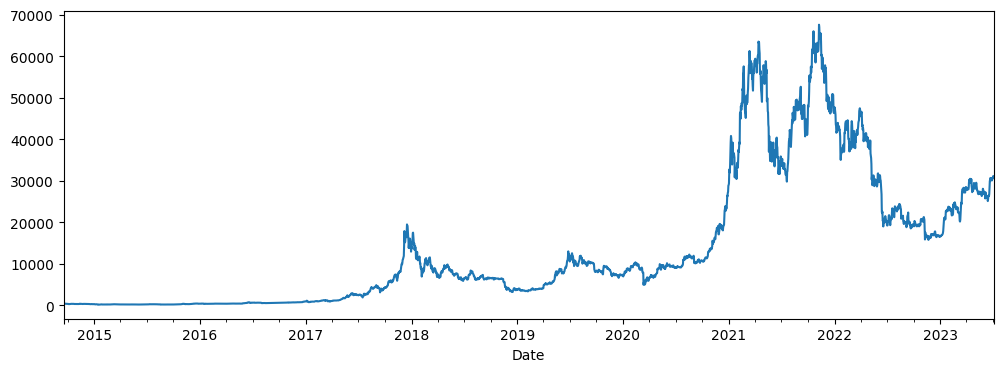

In [72]:
# Visualizar os dados
btc['Close'].plot(figsize=(12, 4))

In [63]:
# Dividir os dados em treino e teste
df_treino = btc.iloc[:int(.99*len(btc)), :]
df_teste = btc.iloc[int(.99*len(btc)):, :]

In [64]:
# Definir as variáveis independentes e dependentes
atributos = ['Open', 'Volume']
alvo = 'Close'

In [65]:
# Criar o modelo
modelo = xgb.XGBRegressor()

# Treinar o modelo
modelo.fit(df_treino[atributos], df_treino[alvo])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [66]:
# Fazer as previsões
previsoes = modelo.predict(df_teste[atributos])
print('Previsões: ', previsoes)

Previsões:  [26870.973 27641.559 27193.09  27228.016 26475.771 26984.645 26612.787
 26500.818 26518.508 26500.818 26500.818 26519.943 26680.297 26477.215
 26516.74  26500.818 26463.424 26519.943 27159.318 27645.762 30248.959
 30139.25  30016.195 30016.195 29920.451 30012.604 30042.87  30099.24
 29873.285 29872.904 29864.736 29880.926 30084.008]


In [67]:
# Visualizar os valores reais e as previsões
print('Valores reais: ', df_teste[alvo].values)

Valores reais:  [27249.58984375 27075.12890625 27119.06640625 25760.09765625
 27238.78320312 26345.99804688 26508.21679688 26480.375
 25851.24023438 25940.16796875 25902.5        25918.72851562
 25124.67578125 25576.39453125 26327.46289062 26510.67578125
 26336.21289062 26851.02929688 28327.48828125 30027.296875
 29912.28125    30695.46875    30548.6953125  30480.26171875
 30271.13085938 30688.1640625  30086.24609375 30445.3515625
 30477.25195312 30590.078125   30620.76953125 31156.43945312
 30928.60351562]


In [68]:
# Visualizar a acurácia do modelo
acuracia = modelo.score(df_teste[atributos], df_teste[alvo])
acuracia

0.8543055899864603

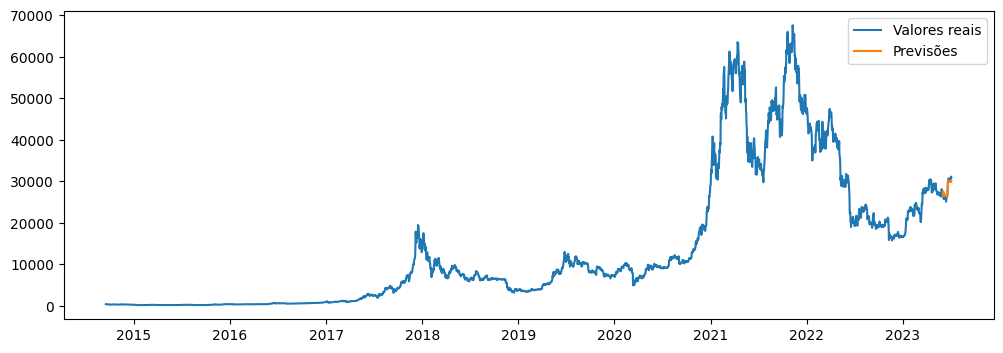

In [76]:
# Plotar os valores reais e as previsões
plt.figure(figsize=(12, 4))
plt.plot(btc['Close'], label='Valores reais')
plt.plot(df_teste[alvo].index, previsoes, label='Previsões')
plt.legend()
plt.show()

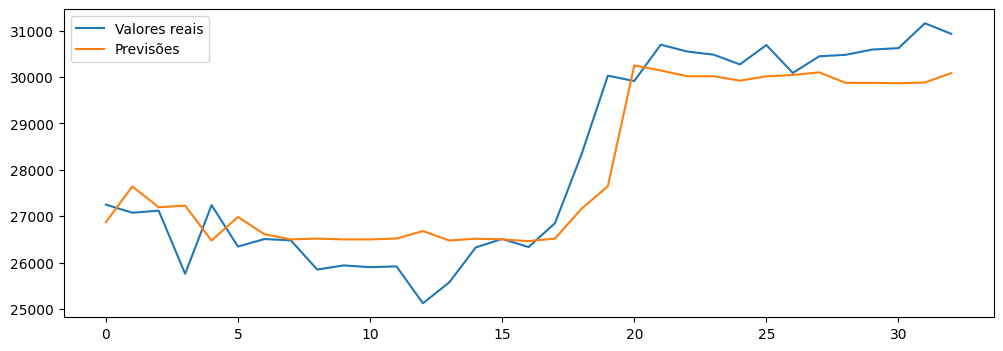

In [75]:
# Plotar os valores reais e as previsões
plt.figure(figsize=(12, 4))
plt.plot(df_teste[alvo].values, label='Valores reais')
plt.plot(previsoes, label='Previsões')
plt.legend()
plt.show()
